In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


# VERİYİ MODELE HAZIRLAMA VE GEREKLİ KÜTÜPHANELERİN YÜKLENMESİ

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import cv2
import os

In [3]:
data='/gdrive/My Drive/Pneumonia/X-Ray/'


In [4]:
os.listdir(data)

['Viral', 'Bacterial']

In [5]:
CATEGORIES = ['Viral', 'Bacterial']
IMG_SIZE = 100

In [6]:
X = []
y = []


def load_data():
    for category in CATEGORIES:
        path = os.path.join(data, category)
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                X.append(new_array)
                y.append(class_num)
            except Exception as e:
                pass

load_data()

In [7]:
X = np.array(X)
y = np.array(y)

1. ELEMENTE GÖRE TRAIN TEST VALIDATION DEĞELERİNİ AYIRDIM.

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state =42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

3. ELEMENTE GÖRE TRAIN TEST VALIDATION DEĞELERİNİ AYIRDIM.

 AŞAĞIDAKİ İŞLEMLERİ HANGİSİNDE YAPMAK İSTİYORSANIZ ONU ÇALIŞTIRIN.

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

In [10]:

x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

x_val = np.array(x_val)
y_val = np.array(y_val)


In [11]:
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("x_val shape: ", x_val.shape)
print("\ny_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
print("y_val shape: ", y_val.shape)

x_train shape:  (72, 100, 100, 3)
x_test shape:  (36, 100, 100, 3)
x_val shape:  (9, 100, 100, 3)

y_train shape:  (72,)
y_test shape:  (36,)
y_val shape:  (9,)


In [12]:
import tensorflow as tf

train_yCl = tf.keras.utils.to_categorical(y_train, num_classes=2)
test_yCl = tf.keras.utils.to_categorical(y_test, num_classes=2)
valid_yCl = tf.keras.utils.to_categorical(y_val, num_classes=2)

# CNN MODELİ

In [13]:
from keras.layers import Input, Dense, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential

model = Sequential()

model.add(Conv2D(64, (3,3), padding='same', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 activation (Activation)     (None, 100, 100, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 activation_1 (Activation)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 50, 50, 64)        256       
 Normalization)                                         

In [14]:
from tensorflow import keras

callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor = 'val_accuracy', save_best_only=True, verbose=3
    ),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=3)
]

In [15]:
import time
start = time.time()

history = model.fit(x_train, train_yCl,
                    batch_size=64,
                    validation_data = (x_val, valid_yCl),
                    callbacks = callback_list,
                    epochs = 1
                    #epochs = 50
                    )
print("Eğitim süresi: ", time.time() - start, "saniye")

2/2 [==============================] - ETA: 0s - loss: 4.5125 - accuracy: 0.4583 
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 18s 2s/step - loss: 4.5125 - accuracy: 0.4583 - val_loss: 42.6365 - val_accuracy: 0.3333
Eğitim süresi:  18.155635118484497 saniye


In [16]:
score_valid = model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_valid[1])

score_test = model.evaluate(x_test, test_yCl)
print("Test Accuracy: ", score_test[1])

score_train = model.evaluate(x_train, train_yCl)
print("Train Accuracy: ", score_train[1])

1/1 [==============================] - 0s 305ms/step - loss: 42.6365 - accuracy: 0.3333
Validation Accuracy:  0.3333333432674408
2/2 [==============================] - 1s 212ms/step - loss: 34.9510 - accuracy: 0.4444
Test Accuracy:  0.4444444477558136
3/3 [==============================] - 4s 949ms/step - loss: 32.0440 - accuracy: 0.4861
Train Accuracy:  0.4861111044883728


In [17]:
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

2/2 [==============================] - 1s 122ms/step


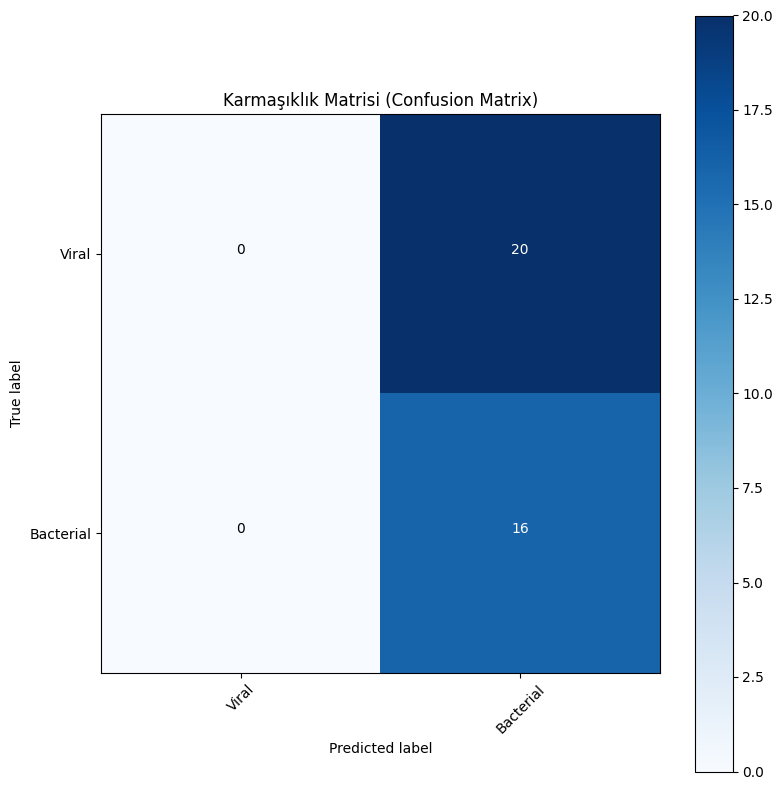

In [19]:
labels_names = [0,1]

Y_pred = model.predict(x_test)

y_pred_model = np.argmax(Y_pred, axis=1)

cm_model = confusion_matrix(y_test, y_pred_model)
plot_confusion_matrix(cm_model, CATEGORIES, normalize=False, title='Karmaşıklık Matrisi (Confusion Matrix)')

In [20]:
from sklearn.utils.extmath import weighted_mode
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

accuracy = accuracy_score(y_test, y_pred_model)
print('CNN Accuracy Değeri: %f' % accuracy)

precision = precision_score(y_test, y_pred_model,average='weighted',zero_division=0)
print('CNN Precision Değeri: %f' % precision)

recall = recall_score(y_test, y_pred_model,average='weighted',zero_division=0)
print('CNN Recall Değeri: %f' % recall)

f1 = f1_score(y_test, y_pred_model,average='weighted',zero_division=0)
print('CNN F1 Değeri: %f' % f1)

CNN Accuracy Değeri: 0.444444
CNN Precision Değeri: 0.197531
CNN Recall Değeri: 0.444444
CNN F1 Değeri: 0.273504


In [21]:
print(classification_report(y_test,y_pred_model,zero_division=0 ))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.44      1.00      0.62        16

    accuracy                           0.44        36
   macro avg       0.22      0.50      0.31        36
weighted avg       0.20      0.44      0.27        36



In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# SVM model
svm_model = SVC()

# Parametre ızgarası
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 0.1, 1],
    'degree': [2, 3, 4],
}
num_features = x_train.shape[1] * x_train.shape[2] * x_train.shape[3]
X_train = x_train.reshape(-1, num_features)
# Grid Search
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5,  error_score='raise')
grid_search_svm.fit(X_train, y_train)


# En iyi parametreleri ve en iyi skoru görüntüleme
print("En iyi parametreler: ", grid_search_svm.best_params_)
print("En iyi skor: ", grid_search_svm.best_score_)

En iyi parametreler:  {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
En iyi skor:  1.0



# RESNET50V2

In [23]:
res = tf.keras.applications.ResNet50V2(
    input_shape=(100, 100, 3),
    include_top = False
)

res.trainable = False

94668760/94668760 [==============================] - 4s 0us/step


In [24]:
res_model = Sequential()

res_model.add(res)
res_model.add(Dropout(0.25))
res_model.add(MaxPooling2D())
res_model.add(Flatten())
res_model.add(Dense(256, activation='relu'))
res_model.add(BatchNormalization())
res_model.add(Dropout(0.5))
res_model.add(Dense(2, activation='softmax'))

In [25]:
res_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
res_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 4, 4, 2048)        23564800  
                                                                 
 dropout_4 (Dropout)         (None, 4, 4, 2048)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 2, 2, 2048)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 256)               2097408   
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                     

In [26]:
import time
start = time.time()

hist = res_model.fit(x_train, train_yCl,
                     batch_size=128,
                     epochs = 1,
                     validation_data = (x_val, valid_yCl)
                     )

print("Eğitim süresi: ", time.time() - start, "saniye")

1/1 [==============================] - 14s 14s/step - loss: 1.5639 - accuracy: 0.3611 - val_loss: 15.3043 - val_accuracy: 0.7778
Eğitim süresi:  14.042969226837158 saniye


In [27]:
score_train_RESNET = res_model.evaluate(x_train, train_yCl)
print("Train Accuracy: ", score_train_RESNET[1])

score_test_RESNET = res_model.evaluate(x_test, test_yCl)
print("Test Accuracy: ", score_test_RESNET[1])

score_val_RESNET = res_model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_val_RESNET[1])

3/3 [==============================] - 2s 656ms/step - loss: 6.9251 - accuracy: 0.7917
Train Accuracy:  0.7916666865348816
2/2 [==============================] - 1s 156ms/step - loss: 11.6191 - accuracy: 0.7222
Test Accuracy:  0.7222222089767456
1/1 [==============================] - 0s 331ms/step - loss: 15.3043 - accuracy: 0.7778
Validation Accuracy:  0.7777777910232544


In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

2/2 [==============================] - 3s 265ms/step


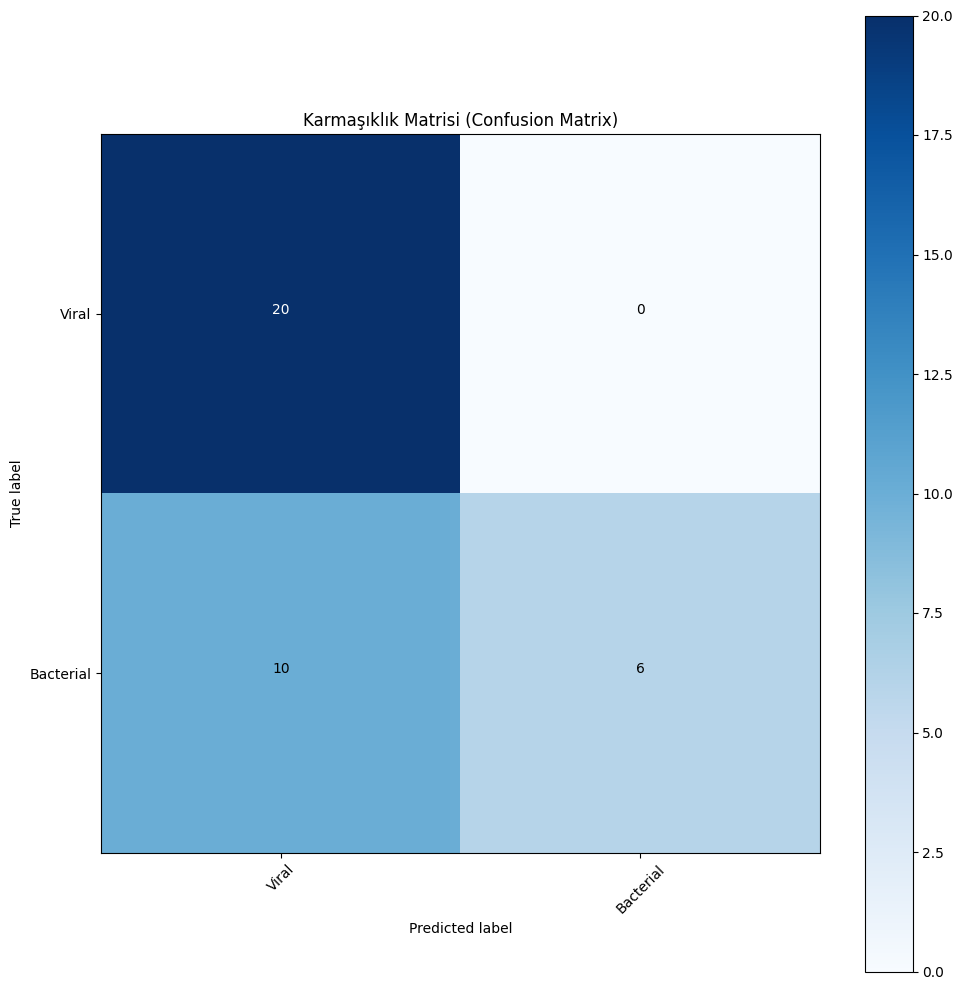

In [29]:

labels_names = [0,1]

Y_pred = res_model.predict(x_test)

y_pred_resnet = np.argmax(Y_pred, axis=1)

cm_RESNET = confusion_matrix(y_test, y_pred_resnet)
plot_confusion_matrix(cm_RESNET, CATEGORIES, normalize=False, title='Karmaşıklık Matrisi (Confusion Matrix)')

In [30]:
from sklearn.utils.extmath import weighted_mode
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

accuracy = accuracy_score(y_test, y_pred_resnet)
print(' RESNET50 Accuracy Değeri: %f' % accuracy)

precision = precision_score(y_test, y_pred_resnet,average='weighted',zero_division=0)
print('RESNET50 Precision Değeri: %f' % precision)

recall = recall_score(y_test, y_pred_resnet,average='weighted',zero_division=0)
print('RESNET50 Recall Değeri: %f' % recall)

f1 = f1_score(y_test, y_pred_resnet,average='weighted',zero_division=0)
print('RESNET50 F1 Değeri: %f' % f1)

 RESNET50 Accuracy Değeri: 0.722222
RESNET50 Precision Değeri: 0.814815
RESNET50 Recall Değeri: 0.722222
RESNET50 F1 Değeri: 0.686869


In [31]:
print(classification_report(y_test,y_pred_resnet,zero_division=0 ))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        20
           1       1.00      0.38      0.55        16

    accuracy                           0.72        36
   macro avg       0.83      0.69      0.67        36
weighted avg       0.81      0.72      0.69        36



# INCEPTIONv3

In [32]:
inceptionv3 = tf.keras.applications.InceptionV3(
        input_shape=(100, 100, 3),
        include_top = False,
        weights="imagenet"
)

inceptionv3.trainable = False

87910968/87910968 [==============================] - 4s 0us/step


In [33]:
inceptionv3_model = Sequential()

inceptionv3_model.add(inceptionv3)
inceptionv3_model.add(Dropout(0.25))
#inceptionv3_model.add(MaxPooling2D())
inceptionv3_model.add(Flatten())
inceptionv3_model.add(Dense(256, activation='relu'))
inceptionv3_model.add(BatchNormalization())
inceptionv3_model.add(Dropout(0.5))
inceptionv3_model.add(Dense(2, activation='softmax'))

In [34]:
inceptionv3_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
import time
start = time.time()

hist = inceptionv3_model.fit(x_train, train_yCl,
                     batch_size=128,
                     #epochs = 50,
                             epochs = 1,
                     validation_data = (x_val, valid_yCl)
                     )

print("Eğitim süresi: ", time.time() - start, "saniye")

1/1 [==============================] - 10s 10s/step - loss: 1.2014 - accuracy: 0.5278 - val_loss: 3.0499 - val_accuracy: 0.7778
Eğitim süresi:  12.146796941757202 saniye


In [36]:
score_train_INCEPV3 = inceptionv3_model.evaluate(x_train, train_yCl)
print("Train Accuracy: ", score_train_INCEPV3[1])

score_test_INCEPV3 = inceptionv3_model.evaluate(x_test, test_yCl)
print("Test Accuracy: ", score_test_INCEPV3[1])

score_val_INCEPV3 = inceptionv3_model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_val_INCEPV3[1])

3/3 [==============================] - 1s 295ms/step - loss: 0.1616 - accuracy: 0.9722
Train Accuracy:  0.9722222089767456
2/2 [==============================] - 1s 80ms/step - loss: 1.8428 - accuracy: 0.8889
Test Accuracy:  0.8888888955116272
1/1 [==============================] - 0s 171ms/step - loss: 3.0499 - accuracy: 0.7778
Validation Accuracy:  0.7777777910232544


2/2 [==============================] - 3s 221ms/step


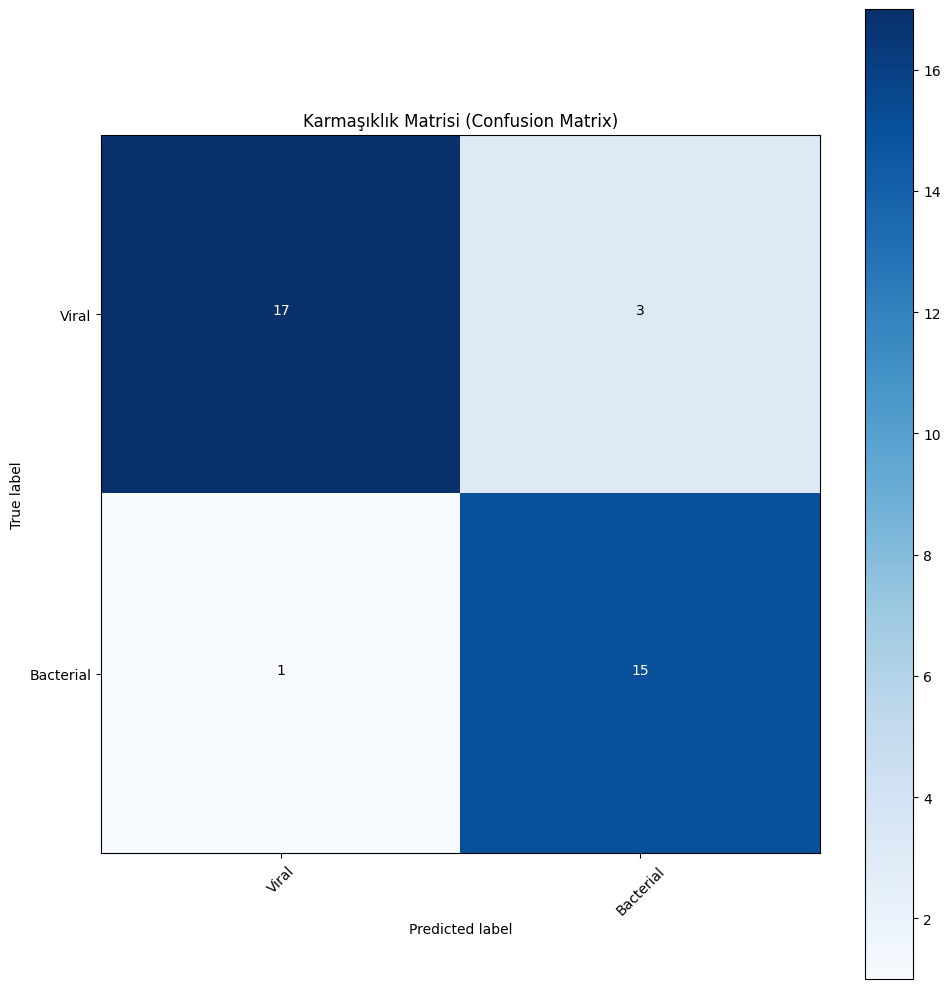

In [37]:
labels_names = [0,1]

Y_pred = inceptionv3_model.predict(x_test)

y_pred_INCEPV3 = np.argmax(Y_pred, axis=1)

cm_INCEPV3 = confusion_matrix(y_test, y_pred_INCEPV3)
plot_confusion_matrix(cm_INCEPV3, CATEGORIES, normalize=False, title='Karmaşıklık Matrisi (Confusion Matrix)')

In [38]:
from sklearn.utils.extmath import weighted_mode
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

accuracy = accuracy_score(y_test, y_pred_INCEPV3)
print('INCEPTIONv3 Accuracy Değeri: %f' % accuracy)

precision = precision_score(y_test, y_pred_INCEPV3,average='weighted',zero_division=0)
print('INCEPTIONv3 Precision Değeri: %f' % precision)

recall = recall_score(y_test, y_pred_INCEPV3,average='weighted',zero_division=0)
print('INCEPTIONv3 Recall Değeri: %f' % recall)

f1 = f1_score(y_test, y_pred_INCEPV3,average='weighted',zero_division=0)
print('INCEPTIONv3 F1 Değeri: %f' % f1)

INCEPTIONv3 Accuracy Değeri: 0.888889
INCEPTIONv3 Precision Değeri: 0.895062
INCEPTIONv3 Recall Değeri: 0.888889
INCEPTIONv3 F1 Değeri: 0.889233


In [39]:
print(classification_report(y_test,y_pred_INCEPV3 ,zero_division=0))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89        20
           1       0.83      0.94      0.88        16

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.90      0.89      0.89        36



# Yapay Sinir Ağları

In [40]:
from tensorflow.keras import layers

In [41]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
ann_model = Sequential()
ann_model.add(Flatten(input_shape=(100, 100, 3)))
ann_model.add(layers.Dense(16, activation="relu"))
ann_model.add(layers.Dense(8, activation="relu"))
ann_model.add(BatchNormalization())
ann_model.add(Dense(2))
ann_model.add(Activation('softmax'))
ann_model.summary()
ann_model.compile(optimizer='Adam',loss="binary_crossentropy",metrics=["accuracy"])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 30000)             0         
                                                                 
 dense_7 (Dense)             (None, 16)                480016    
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 batch_normalization_99 (Ba  (None, 8)                 32        
 tchNormalization)                                               
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
 activation_103 (Activation  (None, 2)                 0         
 )                                                    

In [42]:
from tensorflow import keras

callback_list = [
    keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor = 'val_accuracy', save_best_only=True, verbose=3
    ),
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=3)
]

In [43]:
history = ann_model.fit(x_train, train_yCl,
                    batch_size=128,
                    validation_data = (x_val, valid_yCl),
                    callbacks = callback_list,
                    epochs = 20
                    )


Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 0.5706 - accuracy: 0.7639
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to model.h5
1/1 [==============================] - 5s 5s/step - loss: 0.5706 - accuracy: 0.7639 - val_loss: 1088.3629 - val_accuracy: 0.6667


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/20
1/1 [==============================] - ETA: 0s - loss: 0.6170 - accuracy: 0.5972
Epoch 2: val_accuracy did not improve from 0.66667
1/1 [==============================] - 0s 97ms/step - loss: 0.6170 - accuracy: 0.5972 - val_loss: 71.3923 - val_accuracy: 0.6667
Epoch 3/20
1/1 [==============================] - ETA: 0s - loss: 0.5903 - accuracy: 0.7361
Epoch 3: val_accuracy did not improve from 0.66667
1/1 [==============================] - 0s 132ms/step - loss: 0.5903 - accuracy: 0.7361 - val_loss: 26.6852 - val_accuracy: 0.6667
Epoch 4/20
1/1 [==============================] - ETA: 0s - loss: 0.5993 - accuracy: 0.7222
Epoch 4: val_accuracy did not improve from 0.66667
1/1 [==============================] - 0s 175ms/step - loss: 0.5993 - accuracy: 0.7222 - val_loss: 20.4202 - val_accuracy: 0.6667
Epoch 5/20
1/1 [==============================] - ETA: 0s - loss: 0.5890 - accuracy: 0.7500
Epoch 5: val_accuracy did not improve from 0.66667
1/1 [==============================] - 

In [44]:
score_valid_ann = ann_model.evaluate(x_val, valid_yCl)
print("Validation Accuracy: ", score_valid[1])

score_test_ann = ann_model.evaluate(x_test, test_yCl)
print("Validation Accuracy: ", score_test[1])

score_train_ann = ann_model.evaluate(x_train, train_yCl)
print("Validation Accuracy: ", score_train[1])

1/1 [==============================] - 0s 27ms/step - loss: 4.8471 - accuracy: 0.6667
Validation Accuracy:  0.3333333432674408
2/2 [==============================] - 0s 8ms/step - loss: 6.5687 - accuracy: 0.5556
Validation Accuracy:  0.4444444477558136
3/3 [==============================] - 0s 6ms/step - loss: 7.7032 - accuracy: 0.5139
Validation Accuracy:  0.4861111044883728


2/2 [==============================] - 0s 8ms/step


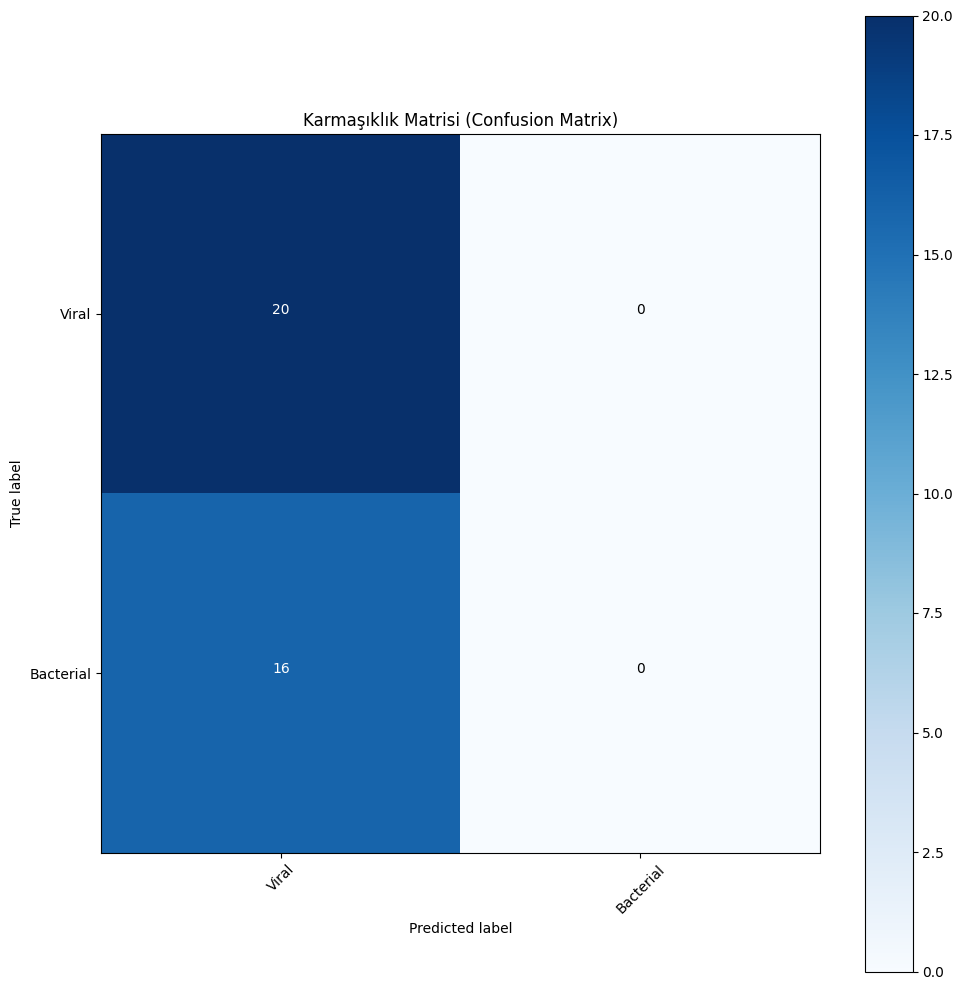

In [45]:
labels_names = [0,1]

Y_pred = ann_model.predict(x_test)

y_pred_ann = np.argmax(Y_pred, axis=1)

cm_ann = confusion_matrix(y_test, y_pred_ann)
plot_confusion_matrix(cm_ann, CATEGORIES, normalize=False, title='Karmaşıklık Matrisi (Confusion Matrix)')

In [46]:
from sklearn.utils.extmath import weighted_mode
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

accuracy = accuracy_score(y_test, y_pred_ann)
print('INCEPTIONv3 Accuracy Değeri: %f' % accuracy)

precision = precision_score(y_test, y_pred_ann,average='weighted',zero_division=0)
print('INCEPTIONv3 Precision Değeri: %f' % precision)

recall = recall_score(y_test, y_pred_ann,average='weighted',zero_division=0)
print('INCEPTIONv3 Recall Değeri: %f' % recall)

f1 = f1_score(y_test, y_pred_ann,average='weighted',zero_division=0)
print('INCEPTIONv3 F1 Değeri: %f' % f1)
print("------------------------------------------------------------------")

print(classification_report(y_test,y_pred_ann ,zero_division=0))

print("------------------------------------------------------------------")


INCEPTIONv3 Accuracy Değeri: 0.555556
INCEPTIONv3 Precision Değeri: 0.308642
INCEPTIONv3 Recall Değeri: 0.555556
INCEPTIONv3 F1 Değeri: 0.396825
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.56      1.00      0.71        20
           1       0.00      0.00      0.00        16

    accuracy                           0.56        36
   macro avg       0.28      0.50      0.36        36
weighted avg       0.31      0.56      0.40        36

------------------------------------------------------------------
